# Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition

https://www.jair.org/media/639/live-639-1834-jair.pdf
Page 236, Example 3.1
    
A 5-by-5 grid world inhabited by a taxi agent. There are four specially-designated
locations in this world, marked as R(ed), B(lue), G(reen), and Y(ellow). The taxi problem
is episodic. In each episode, the taxi starts in a randomly-chosen square. There is a
passenger at one of the four locations (chosen randomly), and that passenger wishes to be
transported to one of the four locations (also chosen randomly). The taxi must go to the
passenger's location (the \source"), pick up the passenger, go to the destination location
(the \destination"), and put down the passenger there. (To keep things uniform, the taxi
must pick up and drop off the passenger even if he/she is already located at the destination!)
The episode ends when the passenger is deposited at the destination location.

There are six primitive actions in this domain: (a) four navigation actions that move the
taxi one square North, South, East, or West, (b) a Pickup action, and (c) a Putdown action.
There is a reward of 1 for each action and an additional reward of +20 for successfully
delivering the passenger. There is a reward of 10 if the taxi attempts to execute the Putdown or Pickup actions illegally. If a navigation action would cause the taxi to hit a
wall, the action is a no-op, and there is only the usual reward of 1.

To simplify the examples throughout this section, we will make the six primitive actions
deterministic. Later, we will make the actions stochastic in order to create a greater
challenge for our learning algorithms.

We seek a policy that maximizes the total reward per episode. There are 500 possible
states: 25 squares for taxi location, 5 locations for the passenger (the four starting locations and
passenger in taxi), and 4 destinations.


# OpenAI Gym Taxi-v2

https://gym.openai.com/envs/Taxi-v1/

OpenAI Gym defines "solving" this task as getting average return of 9.7 over 100 consecutive trials.

While this mini project is ungraded, we recommend that you try to attain an average return of at least 9.1 over 100 consecutive trials (best_avg_reward > 9.1).


https://gym.openai.com/envs/Taxi-v2/

This task was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.



https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py
The Taxi Problem
    from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition https://www.jair.org/media/639/live-639-1834-jair.pdf"
    by Tom Dietterich

rendering:
    - blue: pickup location
    - magenta: destination location
    - yellow: empty taxi
    - green: full taxi


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 19999/20000, average reward 8.29. || Until episode 15114, best average reward 9.243198+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+----

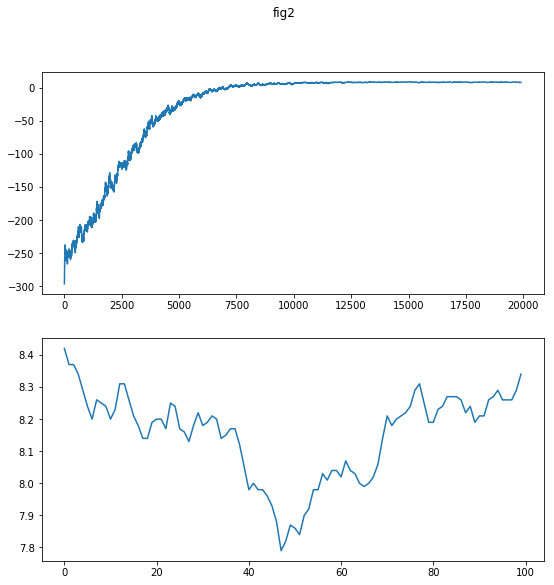

In [26]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.01, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 50000/50000, average reward 8.55. || Until episode 35777, best average reward 9.344572



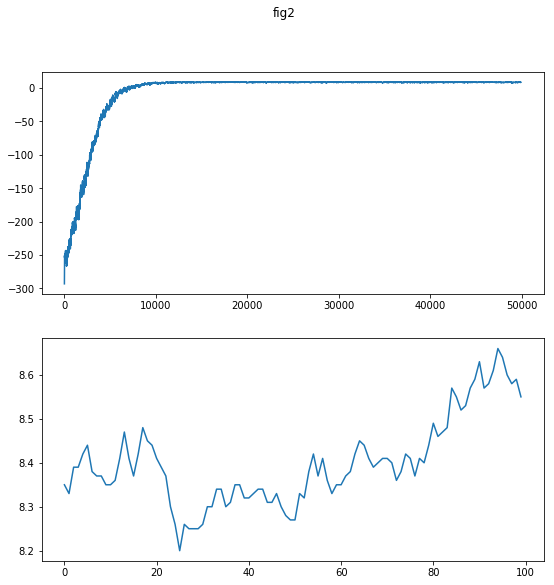

In [25]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.01, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=50000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 20000/20000, average reward 8.51. || Until episode 15762, best average reward 9.127814



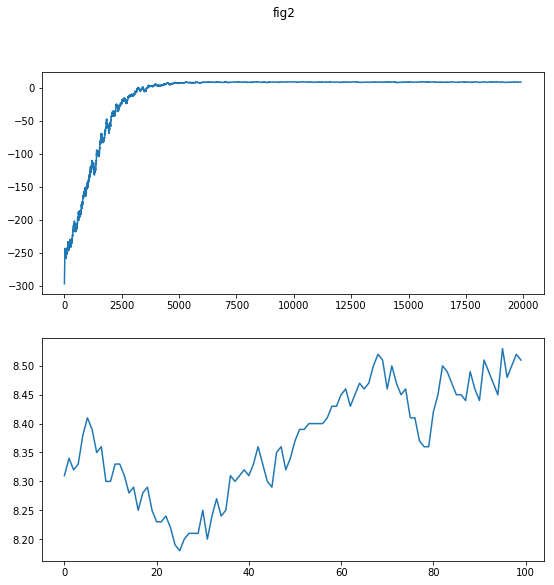

In [23]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.02, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 50000/50000, average reward 8.54. || Until episode 11540, best average reward 9.375385



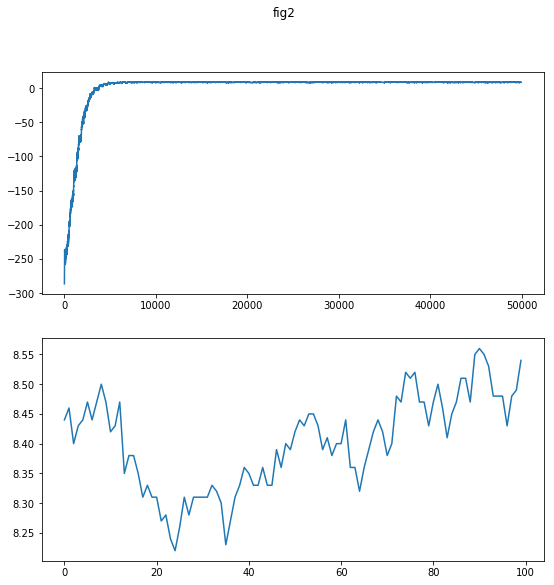

In [24]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.02, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=50000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 20000/20000, average reward 8.36. || Best episode 6352, best average reward 9.19179



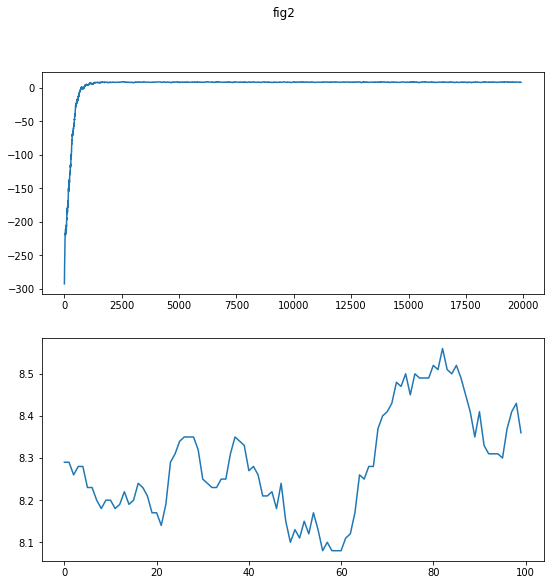

In [18]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.1, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 20000/20000, average reward 8.42. || Until episode 16470, best average reward 9.1498



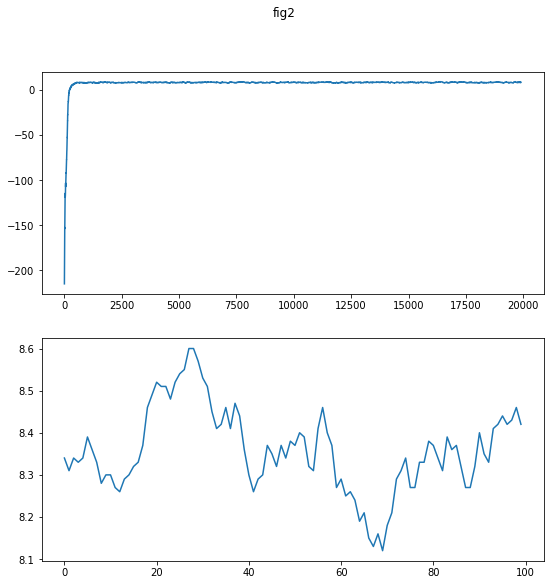

In [19]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.5, gamma=1.0, episode_constant=1.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 20000/20000, average reward 5.54. || Until episode 16723, best average reward 7.219157



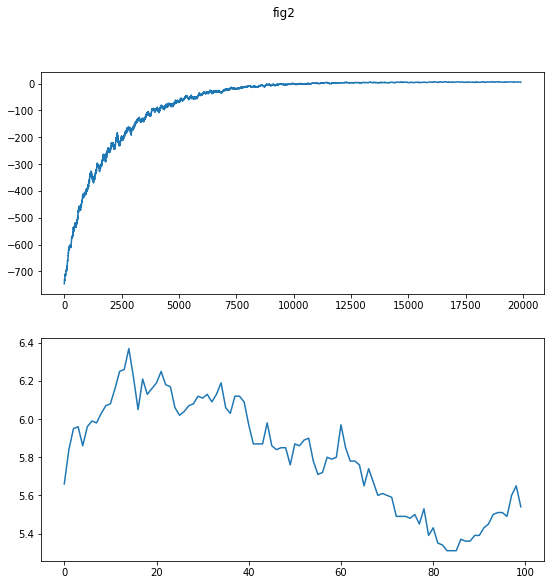

In [21]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.01, gamma=1.0, episode_constant=1000.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode 20000/20000, average reward -4.31. || Until episode 19903, best average reward -2.3754



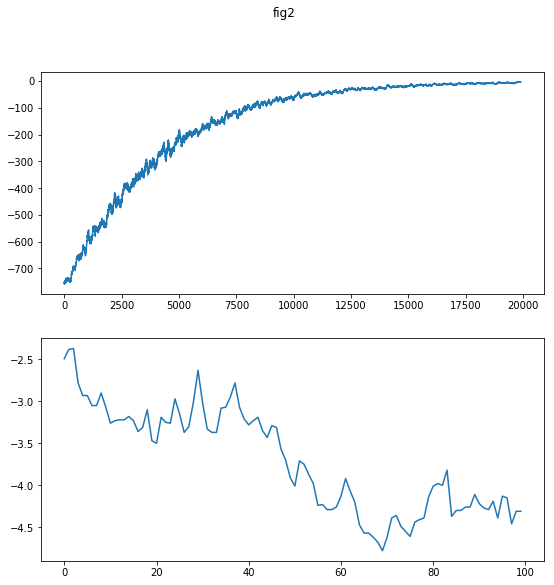

In [20]:
%load_ext autoreload
%autoreload

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import gym

from Agent import Agent
from Monitor import interact

env = gym.make('Taxi-v2')

agent = Agent(alpha=0.01, gamma=1.0, episode_constant=5000.0)
avg_rewards, best_avg_reward, Q = interact(env, agent, num_episodes=20000)

avg_rewards = list(avg_rewards)

plt.figure(1, figsize=(9, 9))

plt.subplot(211)
plt.plot(avg_rewards)

plt.subplot(212)
plt.plot(avg_rewards[-100:])
plt.suptitle('fig2')

plt.show()